<a href="https://colab.research.google.com/github/Pravallika-Myneni/AI4good-2022/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification:
Would a customer of Health Insurance be interested in  Vehicle insurance or not

## Importing necessary libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("/content/income-mapped-zip-code.csv", index_col=[0])

Understanding the data by performing EDA

In [39]:
train_df.head(5)

,Zipcode,Median_Income,Mean_Income,Age Group,Arrest Date,Arrest Key,Ofns Desc,Pd Desc,Perp Race,Perp Sex,Arrest Precinct,Lat,Lon,LatLon
0,10001,96787,166167,<18,3/24/2019,195084931,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,M,14,40.75,-73.99,"(40.75, -73.99)"
1,10001,96787,166167,25-44,7/11/2018,185049784,F.C.A. P.I.N.O.S.,"FUGITIVE,FROM OTHER STATES",WHITE,F,14,40.75,-73.99,"(40.75, -73.99)"
2,10001,96787,166167,25-44,2/11/2019,193435757,GRAND LARCENY,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",WHITE HISPANIC,M,14,40.75,-73.99,"(40.75, -73.99)"
3,10001,96787,166167,25-44,2/10/2019,193411595,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",BLACK,M,14,40.75,-73.99,"(40.75, -73.99)"
4,10001,96787,166167,18-24,4/30/2019,196623657,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,SALE 3",BLACK,M,14,40.75,-73.99,"(40.75, -73.99)"


In [40]:
print(train_df.columns)
print(train_df.shape)


Index(['Zipcode', 'Median_Income', 'Mean_Income', 'Age Group', 'Arrest Date',
       'Arrest Key', 'Ofns Desc', 'Pd Desc', 'Perp Race', 'Perp Sex',
       'Arrest Precinct', 'Lat', 'Lon', 'LatLon'],
      dtype='object')
(593721, 14)


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593721 entries, 0 to 593720
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Zipcode          593721 non-null  int64  
 1   Median_Income    593721 non-null  object 
 2   Mean_Income      593721 non-null  object 
 3   Age Group        593721 non-null  object 
 4   Arrest Date      593721 non-null  object 
 5   Arrest Key       593721 non-null  int64  
 6   Ofns Desc        592619 non-null  object 
 7   Pd Desc          592619 non-null  object 
 8   Perp Race        593721 non-null  object 
 9   Perp Sex         593721 non-null  object 
 10  Arrest Precinct  593721 non-null  int64  
 11  Lat              593721 non-null  float64
 12  Lon              593721 non-null  float64
 13  LatLon           593721 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 67.9+ MB


It seems there are no null objects

## Dropping unwanted columns

In [67]:
train_df_ = train_df.drop(columns = ['Lat', 'Lon', "LatLon"]).copy()
train_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593721 entries, 0 to 593720
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Zipcode          593721 non-null  int64 
 1   Median_Income    593721 non-null  object
 2   Mean_Income      593721 non-null  object
 3   Age Group        593721 non-null  object
 4   Arrest Date      593721 non-null  object
 5   Arrest Key       593721 non-null  int64 
 6   Ofns Desc        592619 non-null  object
 7   Pd Desc          592619 non-null  object
 8   Perp Race        593721 non-null  object
 9   Perp Sex         593721 non-null  object
 10  Arrest Precinct  593721 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 54.4+ MB


### Categorical values

In [68]:
train_df_["Zipcode"]  = train_df_['Zipcode'].astype('category').cat.codes
train_df_["Arrest Key"]  = train_df_['Arrest Key'].astype('category').cat.codes
train_df_["Arrest Precinct"]  = train_df_['Arrest Precinct'].astype('category').cat.codes

train_df_["Age Group"]  = train_df_['Age Group'].astype('category').cat.codes
train_df_["Arrest Date"]  = train_df_['Arrest Date'].astype('category').cat.codes
train_df_["Ofns Desc"]  = train_df_['Ofns Desc'].astype('category').cat.codes
train_df_["Pd Desc"]  = train_df_['Pd Desc'].astype('category').cat.codes
train_df_["Perp Race"]  = train_df_['Perp Race'].astype('category').cat.codes
train_df_["Perp Sex"]  = train_df_['Perp Sex'].astype('category').cat.codes


train_df_["Median_Income_int"]  = train_df_['Median_Income'].str.extract("(\d+)")[0]
train_df_["Mean_Income_int"]  = train_df_['Mean_Income'].str.extract("(\d+)")[0]

In [69]:
train_df_.nunique()/train_df_.shape[0]

Zipcode              0.000325
Median_Income        0.000322
Mean_Income          0.000322
Age Group            0.000008
Arrest Date          0.001846
Arrest Key           1.000000
Ofns Desc            0.000138
Pd Desc              0.000645
Perp Race            0.000012
Perp Sex             0.000003
Arrest Precinct      0.000130
Median_Income_int    0.000172
Mean_Income_int      0.000172
dtype: float64

In [70]:
train_df_['Mean_Income_int'] = train_df_['Mean_Income_int'].astype(int)
train_df_['Median_Income_int'] = train_df_['Median_Income_int'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
train_df_dr = train_df_.drop(columns=['Arrest Key', 'Median_Income', 'Mean_Income'])

In [72]:
train_df_dr.dtypes

Zipcode              int16
Age Group             int8
Arrest Date          int16
Ofns Desc             int8
Pd Desc              int16
Perp Race             int8
Perp Sex              int8
Arrest Precinct       int8
Median_Income_int    int64
Mean_Income_int      int64
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


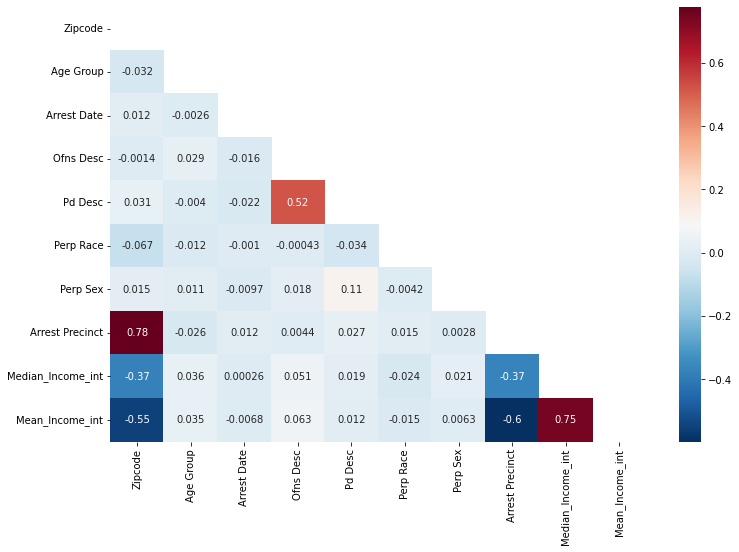

In [74]:
cor=train_df_dr.corr()
lower_triangle_mask = np.triu(np.ones(cor.shape)).astype(np.bool)
cor_mat_lower = cor.mask(lower_triangle_mask)
plt.figure(figsize = (12,8))
import seaborn as sns
sns.heatmap(cor_mat_lower, annot=True, cmap='RdBu_r')

In [26]:
from tables import Column
train_df_v = pd.read_csv('/content/income-mapped-zip-code-(1)-csv.csv', index_col = [0])
train_df_2 = train_df_v.copy().drop(columns = ['Lat', 'Lon', "LatLon"])
train_df_2.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 521809 entries, 0 to 593719
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Zipcode          521809 non-null  int64 
 1   Median_Income    521809 non-null  object
 2   Mean_Income      521809 non-null  object
 3   Age Group        521809 non-null  object
 4   Arrest Date      521809 non-null  object
 5   Arrest Key       521809 non-null  int64 
 6   Ofns Desc        521809 non-null  object
 7   Perp Race        521809 non-null  object
 8   Perp Sex         521809 non-null  object
 9   Arrest Precinct  521809 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 43.8+ MB


In [30]:
train_df_2["Zipcode"]  = train_df_2['Zipcode'].astype('category').cat.codes
train_df_2["Arrest Key"]  = train_df_2['Arrest Key'].astype('category').cat.codes
train_df_2["Arrest Precinct"]  = train_df_2['Arrest Precinct'].astype('category').cat.codes

train_df_2["Age Group"]  = train_df_2['Age Group'].astype('category').cat.codes
train_df_2["Arrest Date"]  = train_df_2['Arrest Date'].astype('category').cat.codes
train_df_2["Ofns Desc"]  = train_df_2['Ofns Desc'].astype('category').cat.codes
train_df_2["Perp Race"]  = train_df_2['Perp Race'].astype('category').cat.codes
train_df_2["Perp Sex"]  = train_df_2['Perp Sex'].astype('category').cat.codes


train_df_2["Median_Income_int"]  = train_df_2['Median_Income'].str.extract("(\d+)")[0]
train_df_2["Mean_Income_int"]  = train_df_2['Mean_Income'].str.extract("(\d+)")[0]
train_df_2 = train_df_2.drop(columns=['Mean_Income', 'Median_Income'])
train_df_2 = train_df_2.dropna()
train_df_2['Mean_Income_int'] = train_df_2['Mean_Income_int'].astype(int)
train_df_2['Median_Income_int'] = train_df_2['Median_Income_int'].astype(int)


In [31]:
train_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320627 entries, 0 to 593719
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Zipcode            320627 non-null  int8 
 1   Age Group          320627 non-null  int8 
 2   Arrest Date        320627 non-null  int16
 3   Arrest Key         320627 non-null  int32
 4   Ofns Desc          320627 non-null  int8 
 5   Perp Race          320627 non-null  int8 
 6   Perp Sex           320627 non-null  int8 
 7   Arrest Precinct    320627 non-null  int8 
 8   Median_Income_int  320627 non-null  int64
 9   Mean_Income_int    320627 non-null  int64
dtypes: int16(1), int32(1), int64(2), int8(6)
memory usage: 11.0 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


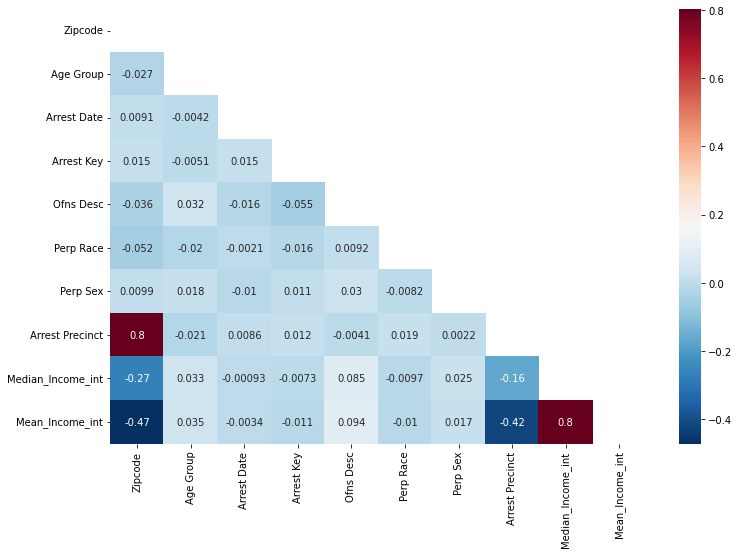

In [32]:
cor=train_df_2.corr()
lower_triangle_mask = np.triu(np.ones(cor.shape)).astype(np.bool)
cor_mat_lower = cor.mask(lower_triangle_mask)
plt.figure(figsize = (12,8))
import seaborn as sns
sns.heatmap(cor_mat_lower, annot=True, cmap='RdBu_r')

# **Model Development**

In [33]:
from sklearn.metrics import accuracy_score

In [38]:
X = train_df_2.drop(['Ofns Desc'],axis=1)
y= train_df_2['Ofns Desc']

In [43]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(X,y,test_size = 0.001, random_state=42)

## Decision Tree

In [44]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_tr,y_tr)

y_pred_dt = dt.predict(x_te)
print(accuracy_score(y_te,y_pred_dt))

0.23052959501557632


# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 15)
rf = rf.fit(x_tr,y_tr)
y_pred_rf = rf.predict(x_te)
print(accuracy_score(y_te,y_pred_rf))

0.22118380062305296


# Bagging Classifier

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)
bagging = bagging.fit(x_tr,y_tr)
y_pred_b = bagging.predict(x_te)
print(accuracy_score(y_te,y_pred_b))

0.26479750778816197


# Adaboost Classifier

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada = ada.fit(x_tr,y_tr)
y_pred_ada = ada.predict(x_te)
print(accuracy_score(y_te,y_pred_ada))

0.08411214953271028


# Voting Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(x_tr, y_tr)
print("LR",eclf1.score(x_te,y_te))

np.array_equal(eclf1.named_estimators_.lr.predict(x_tr),
               eclf1.named_estimators_['lr'].predict(x_tr))

eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(x_tr, y_tr)
print("RFC",eclf2.score(x_te,y_te))


eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,1,1],
       flatten_transform=True)

eclf3 = eclf3.fit(x_tr,y_tr)
print("GNB",eclf3.score(x_te,y_te))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR 0.17445482866043613


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#**Applying the classifier on test_data.csv**

Since the adaboost classifier has more accuracy we will using the adaboost classifier on test data

In [ ]:
print(train_df_1.columns)
print(test_df_1.columns)

Index(['Age', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Response',
       'Gender_Male', 'Vehicle_Damage'],
      dtype='object')
Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Vehicle_Damage',
       'Annual_Premium'],
      dtype='object')


In [ ]:
answers_ada = ada.predict(test_df_v)
set(answers_ada)

{0}

adaboot is giving the response 0 for every record
checking using bagging classifier

In [ ]:
answers_bag = bagging.predict(test_df_v)
set(answers_bag)

{0}

In [ ]:
answers_ada

array([0, 0, 0, ..., 0, 0, 0])